In [1]:
import numpy as np
import pandas as pd
import konlpy 
from konlpy.tag import Mecab
import matplotlib as plt
import re
from tqdm import tqdm
from soykeyword.proportion import CorpusbasedKeywordExtractor

In [2]:
ref=pd.read_csv("attraction_all_translate.csv",encoding='utf-8')

ref=ref.drop([ref.columns[6],ref.columns[7],ref.columns[8]], axis=1)
ref.head()


,space,type,language,day,text,score
0,힐스파,체험,한국어,201702,경치 최고 찜질방에서 하루 숙박했습니다. 달맞이길 윗쪽에 위치해서 해운대 일대가 한...,5
1,힐스파,체험,한국어,201711,경치가 좋은 스파 너무 좋아요. 해운대 바다가 보이는 스파라서 스파하는동안 기분이 ...,5
2,힐스파,체험,한국어,201710,여독풀기 좋은 장소 하루 종일 여행 후 피로를 녹이기 좋은 장소. 주차도 잘 됩니다...,4
3,힐스파,체험,한국어,201602,"달맞이 고개의 훌륭한 목욕탕 달맞이 고개에 자리하고 있으며, 고지대에 위치한 덕분에...",5
4,힐스파,체험,한국어,201504,해운대 달맞이고개의 찜질방. 찜질하는 찜질방입니다. 스파도 같이 운영합니다. 방문객...,3


In [3]:
for index,row in ref.iterrows():
    if ref['score'][index]=="5" or ref['score'][index]=="4":
        ref['score'][index]=1
    else:
        ref['score'][index]=0

C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [4]:
ref.head()

,space,type,language,day,text,score
0,힐스파,체험,한국어,201702,경치 최고 찜질방에서 하루 숙박했습니다. 달맞이길 윗쪽에 위치해서 해운대 일대가 한...,1
1,힐스파,체험,한국어,201711,경치가 좋은 스파 너무 좋아요. 해운대 바다가 보이는 스파라서 스파하는동안 기분이 ...,1
2,힐스파,체험,한국어,201710,여독풀기 좋은 장소 하루 종일 여행 후 피로를 녹이기 좋은 장소. 주차도 잘 됩니다...,1
3,힐스파,체험,한국어,201602,"달맞이 고개의 훌륭한 목욕탕 달맞이 고개에 자리하고 있으며, 고지대에 위치한 덕분에...",1
4,힐스파,체험,한국어,201504,해운대 달맞이고개의 찜질방. 찜질하는 찜질방입니다. 스파도 같이 운영합니다. 방문객...,0


In [5]:
mecab=Mecab(dicpath="C:\mecab\mecab-ko-dic")

for index, row in ref.iterrows():
    ref['text'][index]=re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》;]', '',ref['text'][index])

ref['token']=ref['text'].apply(mecab.pos)


C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [6]:
ref['word']=0
for index, row in tqdm(ref.iterrows()):
    temp=""
    for word in ref['token'][index]:
        if word[1] in ['VV','VA','NNG','XR']:#'
            temp+=word[0]
            temp+=" "
    ref['word'][index]=temp
ref.head()        

0it [00:00, ?it/s]C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
27752it [00:51, 543.81it/s]


,space,type,language,day,text,score,token,word
0,힐스파,체험,한국어,201702,경치 최고 찜질방에서 하루 숙박했습니다 달맞이길 윗쪽에 위치해서 해운대 일대가 한눈...,1,"[(경치, NNG), (최고, NNG), (찜질방, NNG), (에서, JKB), ...",경치 최고 찜질방 하루 숙박 달맞이 길 위치 해운대 한눈 보이 최고 위치 있 숙박 ...
1,힐스파,체험,한국어,201711,경치가 좋은 스파 너무 좋아요 해운대 바다가 보이는 스파라서 스파하는동안 기분이 좋...,1,"[(경치, NNG), (가, JKS), (좋, VA), (은, ETM), (스파, ...",경치 좋 좋 해운대 바다 보이 하 동안 기분 좋 야외 있 시원 좋
2,힐스파,체험,한국어,201710,여독풀기 좋은 장소 하루 종일 여행 후 피로를 녹이기 좋은 장소 주차도 잘 됩니다 ...,1,"[(여독, NNG), (풀, VV), (기, ETN), (좋, VA), (은, ET...",여독 풀 좋 장소 하루 종일 여행 후 피로 녹이 좋 장소 주차 바다 풍경 좋 찜질방...
3,힐스파,체험,한국어,201602,달맞이 고개의 훌륭한 목욕탕 달맞이 고개에 자리하고 있으며 고지대에 위치한 덕분에 ...,1,"[(달맞이, NNG), (고개, NNG), (의, JKG), (훌륭, XR), (한...",달맞이 고개 훌륭 목욕탕 달맞이 고개 자리 고지대 위치 덕분 목욕탕 해운대 아경 감...
4,힐스파,체험,한국어,201504,해운대 달맞이고개의 찜질방 찜질하는 찜질방입니다 스파도 같이 운영합니다 방문객이 많...,0,"[(해운대, NNG), (달맞이, NNG), (고개, NNG), (의, JKG), ...",해운대 달맞이 고개 찜질방 찜질 찜질방 운영 방문객 많 숙박 숙소 사람 많 싸우 밑...


In [7]:
shoppint=[]
culture=[]
nature=[]
history=[]
experience=[]
scene=[]
etc=[]
etc_festival=[]
etc_info=[]
festival=[]
temp=[]

In [8]:
shopping_1=[]
culture_1=[]
nature_1=[]
history_1=[]
experience_1=[]
scene_1=[]
etc_1=[]
etc_festival_1=[]
etc_info_1=[]
festival_1=[]
temp_1=[]
for index, row in ref.iterrows():
    if ref['type'][index] in '문화':
        culture_1.append(row)
    elif ref['type'][index] in '쇼핑':
        shopping_1.append(row)
    elif ref['type'][index] in '자연':
        nature_1.append(row)
    elif ref['type'][index] in '역사':
        history_1.append(row)
    elif ref['type'][index] in '체험':
        experience_1.append(row)
    elif ref['type'][index] in '경관':
        scene_1.append(row)
    elif ref['type'][index] in '기타':
        etc_1.append(row)
    elif ref['type'][index] in '기타-축체':
        etc_festival_1.append(row)
    elif ref['type'][index] in '기타-안내':
        etc_info_1.append(row)
    elif ref['type'][index] in '축제':
        festival_1.append(row)
    else:
        temp_1.append(row)
culture=pd.DataFrame(culture_1)
shopping=pd.DataFrame(shopping_1)
nature=pd.DataFrame(nature_1)
history=pd.DataFrame(history_1)
experience=pd.DataFrame(experience_1)
scene=pd.DataFrame(scene_1)
etc=pd.DataFrame(etc_1)
etc_festival=pd.DataFrame(etc_festival_1)
etc_info=pd.DataFrame(etc_info_1)
festival=pd.DataFrame(festival_1)
temp=pd.DataFrame(temp_1) 

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(
    min_df=0.02,
    max_df=0.5,
    ngram_range=(1,1),
    tokenizer=lambda x: x.split())


X=cv.fit_transform(ref['word'])

# 문화

In [10]:
cv_culture=CountVectorizer(
    min_df=0.007,
    max_df=0.01,
    ngram_range=(1,3),
    tokenizer=lambda x: x.split())

culture_X=cv_culture.fit_transform(culture['word'])

print(culture_X.shape)
cv_culture.vocabulary_

(5989, 226)


{'야외': 126,
 '광장': 21,
 '컨벤션': 197,
 '개최': 6,
 '목적': 72,
 '공연': 16,
 '브랜드': 89,
 '의류': 150,
 '싸': 124,
 '서비스': 104,
 '연결': 131,
 '주차장': 178,
 '카드': 195,
 '평일': 210,
 '여유': 129,
 '교육': 23,
 '깔끔': 37,
 '유익': 148,
 '많 있': 67,
 '시티': 123,
 '가 길': 0,
 '중심': 180,
 '비슷': 91,
 '놀': 42,
 '비오': 92,
 '비오 날': 93,
 '이번': 152,
 '영화제': 134,
 '축제': 193,
 '만족': 64,
 '세련': 105,
 '수준': 113,
 '소개': 107,
 '맞': 70,
 '풍부': 212,
 '크기': 200,
 '있 길': 158,
 '다리': 44,
 '갖': 5,
 '시내': 121,
 '서면': 103,
 '시원': 122,
 '쉬': 115,
 '지하철 선': 185,
 '레스토랑 있': 57,
 '예상': 135,
 '대중': 47,
 '쉽 접근': 116,
 '접근 있': 171,
 '도움 되': 49,
 '측면': 194,
 '음료': 149,
 '기다리': 32,
 '폐쇄': 211,
 '디자인': 54,
 '트': 205,
 '그룹': 26,
 '보석': 85,
 '여성': 128,
 '의상': 151,
 '위대': 146,
 '있 흥미': 164,
 '흥미 장소': 224,
 '변화': 83,
 '동굴': 51,
 '지역 있': 183,
 '만나': 62,
 '요금': 142,
 '상점 카페': 101,
 '게임': 11,
 '전시물': 168,
 '기발': 33,
 '사진 기회': 96,
 '만드': 63,
 '시간 동안': 120,
 '사용 있': 95,
 '넣': 41,
 '필요 있': 214,
 '불구': 88,
 '손': 110,
 '있 사진 찍': 159,
 '라인': 56,
 '관리': 20,
 

In [11]:
culture_names=cv_culture.get_feature_names()
print ( "기능 수 : {}". format (len (culture_names)))
print(culture_names)

기능 수 : 226
['가 길', '가치 없', '가치 있 가치', '가파르', '간판', '갖', '개최', '거리 음식', '걱정', '걸 있', '걸리', '게임', '경치 좋', '계단 있', '골목길', '곳 많', '공연', '과거', '관계', '관광객 많', '관리', '광장', '굉장', '교육', '구매', '국제 시장', '그룹', '그림 같', '기간', '기념 공원', '기념 묘지', '기념물', '기다리', '기발', '기본', '기이', '길 잃', '깔끔', '나가', '날씨 좋', '내용', '넣', '놀', '늦', '다리', '다채 집', '대신', '대중', '대학', '도움 되', '도중', '동굴', '동네', '등반', '디자인', '따르', '라인', '레스토랑 있', '마을 많', '마을 전체', '마을 탐험', '마차', '만나', '만드', '만족', '많 사진 찍', '많 시간', '많 있', '많 작', '맛', '맞', '모양', '목적', '무덤', '문', '문제', '믿', '바뀌', '바람', '반나절', '방문자', '배우', '벚꽃', '변화', '보 있', '보석', '보통', '부족', '불구', '브랜드', '비디오', '비슷', '비오', '비오 날', '사냥', '사용 있', '사진 기회', '사항', '산책 있', '산책로', '상상', '상점 카페', '색', '서면', '서비스', '세련', '센터 지도', '소개', '소요', '속', '손', '수족관 방문', '수족관 있', '수준', '숨', '쉬', '쉽 접근', '슈퍼', '스탬프 랠리', '슬로프', '시간 동안', '시내', '시원', '시티', '싸', '아쿠아리움', '야외', '언덕 꼭대기', '여성', '여유', '역사 있', '연결', '열', '엽서 얻', '영화제', '예상', '예약', '옛날', '오르막', '오르막길', '오브제', '왕자 사진', '요금', '우표 수집', '운동', '원', '위대'

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid={'C':[0.001,0.01,0.1,1,10]}
grid=GridSearchCV(LogisticRegression(),param_grid,cv=10)
grid.fit(culture_X,culture['score'])

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

Best cross-validation score: 0.80
Best parameters:  {'C': 0.1}
Best estimator:  LogisticRegression(C=0.1)


C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


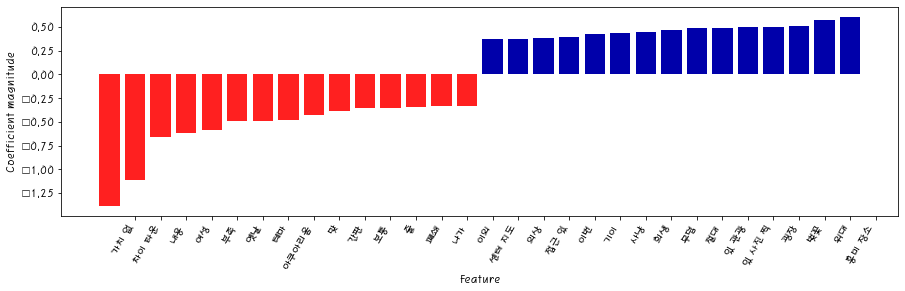

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import mglearn
import matplotlib.font_manager as fm

font_location=r'C:\Windows\Fonts\H2PORM.TTF'
font_name=fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font',family=font_name)
mglearn.tools.visualize_coefficients(grid.best_estimator_.coef_, culture_names, n_top_features=15)
plt.show()

# 자연

In [14]:
cv_nature=CountVectorizer(
    min_df=0.02,
    max_df=0.08,
    ngram_range=(1,3),
    tokenizer=lambda x: x.split())

nature_X=cv_nature.fit_transform(nature['word'])

print(nature_X.shape)
cv_nature.vocabulary_

(6108, 184)


{'주말': 142,
 '여행': 100,
 '축제': 153,
 '주변': 143,
 '시설': 88,
 '편리': 162,
 '산책 좋': 79,
 '아침': 95,
 '되': 45,
 '바다 보': 61,
 '낮': 29,
 '길': 23,
 '열차': 102,
 '가족': 1,
 '오': 104,
 '건물': 6,
 '야경': 98,
 '유명': 108,
 '끝': 25,
 '느낌': 34,
 '좋 곳': 138,
 '코스': 157,
 '풍경': 165,
 '놀': 31,
 '바닷가': 62,
 '날씨': 27,
 '걷 좋': 7,
 '편안': 163,
 '해수욕장': 176,
 '친구': 154,
 '쉽': 87,
 '광안': 18,
 '도시': 41,
 '카페': 155,
 '음식': 109,
 '전': 129,
 '잡': 125,
 '도착': 42,
 '기분': 21,
 '바람': 63,
 '겨울': 9,
 '정도': 133,
 '보이': 66,
 '사람 많': 72,
 '해안': 177,
 '최고': 151,
 '사진': 76,
 '찍': 148,
 '사진 찍': 77,
 '휴식': 182,
 '사용': 75,
 '위치': 107,
 '높': 33,
 '있 좋': 121,
 '비치': 71,
 '식사': 93,
 '좋 장소': 139,
 '분위기': 67,
 '먹': 55,
 '날': 26,
 '물': 59,
 '바': 60,
 '앉': 96,
 '갈매기': 5,
 '날씨 좋': 28,
 '파도': 161,
 '명소': 57,
 '찾': 150,
 '다양': 35,
 '사랑': 74,
 '있 곳': 117,
 '앞': 97,
 '괜찮': 20,
 '다음': 36,
 '관광': 16,
 '추천': 152,
 '있 많': 118,
 '많 사람': 51,
 '시장': 91,
 '마시': 49,
 '아이': 94,
 '차': 149,
 '인기': 112,
 '생각': 82,
 '도보': 40,
 '관광객': 17,
 '도로': 39,
 '있 해변': 

In [15]:
nature_names=cv_nature.get_feature_names()
print ( "기능 수 : {}". format (len (nature_names)))
print(nature_names)

기능 수 : 184
['가깝', '가족', '가지', '가치', '가치 있', '갈매기', '건물', '걷 좋', '걸', '겨울', '경우', '경치', '경험', '계단', '공연', '공원', '관광', '관광객', '광안', '광안 대교', '괜찮', '기분', '기차', '길', '깨끗 해변', '끝', '날', '날씨', '날씨 좋', '낮', '넓', '놀', '놀이', '높', '느낌', '다양', '다음', '대교', '대부분', '도로', '도보', '도시', '도착', '돌', '동안', '되', '들', '등대', '레스토랑 있', '마시', '많 레스토랑', '많 사람', '말', '맑', '매력', '먹', '멋지', '명소', '무료', '물', '바', '바다 보', '바닷가', '바람', '바위', '보내', '보이', '분위기', '불', '불꽃', '붐비', '비치', '사람 많', '사람 있', '사랑', '사용', '사진', '사진 찍', '산', '산책 좋', '산책로', '상점', '생각', '선택', '섬', '수영', '수족관', '쉽', '시설', '시원', '시작', '시장', '시즌', '식사', '아이', '아침', '앉', '앞', '야경', '얻', '여행', '역', '열차', '옆', '오', '오후', '우산', '위치', '유명', '음식', '이상', '인근', '인기', '일', '일몰', '일부', '입구', '있 곳', '있 많', '있 바다', '있 있', '있 좋', '있 해변', '자연', '작', '잡', '재미', '저녁', '적합', '전', '전망대', '전체', '절벽', '정도', '정류장', '제공', '조명', '조용', '좋 곳', '좋 장소', '좋 하', '좋 해변', '주말', '주변', '주위', '지하철', '지하철역', '집', '찍', '차', '찾', '최고', '추천', '축제', '친구', '카페', '커피', '코스', '태양', '투어', '티켓',

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid={'C':[0.001,0.01,0.1,1,10]}
grid=GridSearchCV(LogisticRegression(),param_grid,cv=5)
grid.fit(nature_X,nature['score'])

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

Best cross-validation score: 0.85
Best parameters:  {'C': 0.001}
Best estimator:  LogisticRegression(C=0.001)


C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


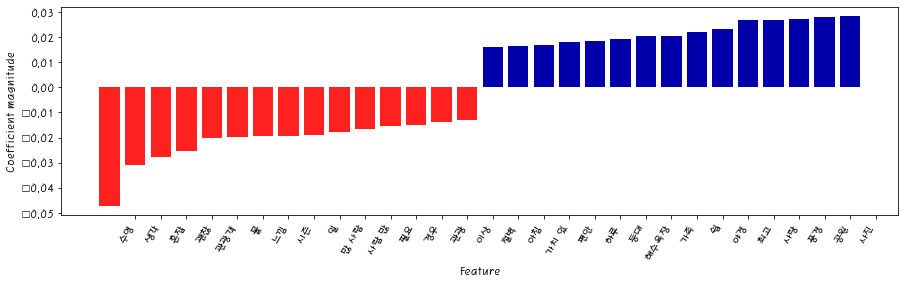

In [17]:
import matplotlib
import matplotlib.pyplot as plt
import mglearn
import matplotlib.font_manager as fm

font_location=r'C:\Windows\Fonts\H2PORM.TTF'
font_name=fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font',family=font_name)
mglearn.tools.visualize_coefficients(grid.best_estimator_.coef_, nature_names, n_top_features=15)
plt.show()

# 역사

In [18]:
cv_history=CountVectorizer(
    min_df=0.03,
    max_df=0.5,
    ngram_range=(1,3),
    tokenizer=lambda x: x.split())

history_X=cv_history.fit_transform(history['word'])

print(history_X.shape)
cv_history.vocabulary_

(3129, 170)


{'불교': 70,
 '해운대': 164,
 '사찰': 82,
 '잡': 125,
 '없': 98,
 '하': 159,
 '분위기': 69,
 '조용': 135,
 '장소': 126,
 '해안': 163,
 '근처': 20,
 '가': 0,
 '도착': 36,
 '곳': 15,
 '훌륭': 168,
 '계단': 13,
 '올라가': 104,
 '지역': 144,
 '느낌': 28,
 '들어가': 43,
 '사람': 73,
 '좋': 136,
 '바다': 54,
 '보': 67,
 '도시': 35,
 '산': 83,
 '산책': 84,
 '입구': 115,
 '방문': 60,
 '보이': 68,
 '같': 4,
 '필요': 158,
 '되': 41,
 '역사': 101,
 '일부': 114,
 '제공': 134,
 '찾': 148,
 '명소': 51,
 '주말': 137,
 '관광': 16,
 '주차장': 140,
 '시간': 89,
 '생각': 85,
 '주변': 138,
 '바닷가': 55,
 '경치': 10,
 '도로': 34,
 '경치 좋': 11,
 '사진': 80,
 '찍': 146,
 '작': 124,
 '사진 찍': 81,
 '위치': 108,
 '얻': 97,
 '절': 130,
 '유명': 109,
 '때': 44,
 '있 절': 120,
 '독특': 37,
 '많': 45,
 '바위': 57,
 '전체': 129,
 '돌': 38,
 '길': 23,
 '있 좋': 121,
 '투어': 154,
 '전망': 128,
 '아름답': 92,
 '앞': 95,
 '즐기': 142,
 '쉽': 88,
 '풍경': 157,
 '관광객': 17,
 '추천': 150,
 '다음': 30,
 '여행': 99,
 '차': 147,
 '말': 47,
 '위': 107,
 '정도': 132,
 '들': 42,
 '최고': 149,
 '경우': 9,
 '하이킹': 161,
 '가치': 2,
 '가치 있': 3,
 '지하철': 145,
 '역': 100,
 '후': 

In [19]:
history_names=cv_history.get_feature_names()
print ( "기능 수 : {}". format (len (history_names)))
print(history_names)

기능 수 : 170
['가', '가지', '가치', '가치 있', '같', '거리', '건물', '걷', '걸', '경우', '경치', '경치 좋', '경험', '계단', '고요', '곳', '관광', '관광객', '궁사', '그림', '근처', '기념품', '기도', '길', '깨끗', '나무', '날', '날씨', '느낌', '다리', '다음', '단계', '대부분', '도달', '도로', '도시', '도착', '독특', '돌', '동상', '동안', '되', '들', '들어가', '때', '많', '많 사람', '말', '매력', '먹', '멋지', '명소', '무료', '물', '바다', '바닷가', '바람', '바위', '밖', '받', '방문', '방문 가치', '방문 가치 있', '방법', '버스', '버스 정류장', '버스 타', '보', '보이', '분위기', '불교', '불교 사원', '붐비', '사람', '사람 많', '사랑', '사용', '사원 바다', '사원 방문', '사원 사원', '사진', '사진 찍', '사찰', '산', '산책', '생각', '성전', '소원', '쉽', '시간', '신발', '아름', '아름답', '아침', '알', '앞', '언덕', '얻', '없', '여행', '역', '역사', '옆', '오', '올라가', '용', '용 궁사', '위', '위치', '유명', '음식', '이상', '인상', '일', '일부', '입구', '있 많', '있 버스', '있 사원', '있 성전', '있 절', '있 좋', '자연', '자체', '작', '잡', '장소', '전', '전망', '전체', '절', '절벽', '정도', '정류장', '제공', '조용', '좋', '주말', '주변', '주요', '주차장', '준비', '즐기', '지', '지역', '지하철', '찍', '차', '찾', '최고', '추천', '출구', '타', '택시', '투어', '편안', '평화', '풍경', '필요', '하', '하루', '하이킹'

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid={'C':[0.001,0.01,0.1,1,10]}
grid=GridSearchCV(LogisticRegression(),param_grid,cv=5)
grid.fit(history_X,history['score'])

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

Best cross-validation score: 0.85
Best parameters:  {'C': 0.01}
Best estimator:  LogisticRegression(C=0.01)


C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


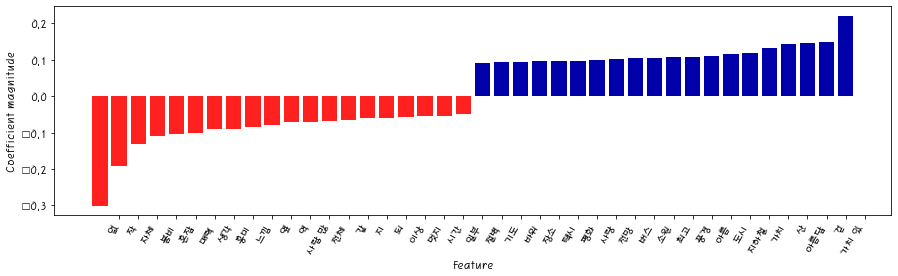

In [21]:
import matplotlib
import matplotlib.pyplot as plt
import mglearn
import matplotlib.font_manager as fm

font_location=r'C:\Windows\Fonts\H2PORM.TTF'
font_name=fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font',family=font_name)
mglearn.tools.visualize_coefficients(grid.best_estimator_.coef_, history_names, n_top_features=20)
plt.show()

# 체험

In [22]:
cv_experience=CountVectorizer(
    min_df=0.03,
    max_df=0.1,
    ngram_range=(1,3),
    tokenizer=lambda x: x.split())

experience_X=cv_experience.fit_transform(experience['word'])

print(experience_X.shape)
cv_experience.vocabulary_

(1440, 189)


{'최고': 164,
 '하루': 180,
 '위치': 123,
 '해운대': 183,
 '보이': 65,
 '기분': 18,
 '야외': 105,
 '풀': 178,
 '여행': 108,
 '자리': 141,
 '비싸': 71,
 '물': 55,
 '즐기': 157,
 '이용': 128,
 '식사': 94,
 '옆': 112,
 '레스토랑': 41,
 '사람 많': 72,
 '다음': 29,
 '날': 20,
 '아침': 98,
 '택시': 174,
 '거리': 8,
 '평일': 177,
 '밤': 60,
 '야경': 104,
 '보': 63,
 '오': 114,
 '층': 167,
 '안': 99,
 '영어': 110,
 '일본어': 133,
 '방법': 61,
 '있 좋': 139,
 '밖': 58,
 '들어가': 36,
 '느낌': 28,
 '시티': 92,
 '처음': 162,
 '체험': 163,
 '몸': 52,
 '따뜻': 37,
 '괜찮': 15,
 '먹': 51,
 '음식': 125,
 '기대': 17,
 '이상': 127,
 '앉': 100,
 '식당': 93,
 '맛있': 49,
 '알': 101,
 '일반': 132,
 '요금': 119,
 '온도': 116,
 '종류': 152,
 '마사지': 45,
 '놀': 26,
 '공간': 13,
 '수영장': 87,
 '선택': 82,
 '크': 171,
 '외국인': 118,
 '가족': 1,
 '사우나': 77,
 '작': 143,
 '아이': 97,
 '커플': 170,
 '마지막': 47,
 '부분': 66,
 '주': 154,
 '이후': 130,
 '돈': 32,
 '가지': 2,
 '자신': 142,
 '서비스': 81,
 '일': 131,
 '필요': 179,
 '취하': 166,
 '주말': 155,
 '휴식 취하': 188,
 '말': 48,
 '도착': 31,
 '욕조': 122,
 '바디': 57,
 '호텔': 185,
 '자': 140,
 '찾': 161,
 '바닥': 

In [23]:
experience_names=cv_experience.get_feature_names()
print ( "기능 수 : {}". format (len (experience_names)))
print(experience_names)

기능 수 : 189
['가능', '가족', '가지', '가치', '가치 있', '개인', '객실', '거대', '거리', '걷', '게임', '경우', '고급', '공간', '관광객', '괜찮', '근처', '기대', '기분', '긴장', '날', '남성', '남성 여성', '낮', '넓', '넣', '놀', '높', '느낌', '다음', '대부분', '도착', '돈', '돌', '드', '들', '들어가', '따뜻', '땀', '때밀이', '랜드', '레스토랑', '로커', '룰렛', '룸', '마사지', '마시', '마지막', '말', '맛있', '맥주', '먹', '몸', '무료', '문화', '물', '바닥', '바디', '밖', '발', '밤', '방법', '백화점', '보', '보내', '보이', '부분', '분리', '분위기', '비', '비교', '비싸', '사람 많', '사랑', '사물함', '사용 있', '사우', '사우나', '사진', '샤워', '샴푸', '서비스', '선택', '세계', '손', '쇼핑', '수건', '수영장', '쉽', '슈퍼', '시간 있', '시도', '시티', '식당', '식사', '신발', '신세계', '아이', '아침', '안', '앉', '알', '알몸', '앞', '야경', '야외', '얻', '여성', '여행', '역', '영어', '영역', '옆', '예약', '오', '오후', '온도', '옷', '외국인', '요금', '요리', '욕실', '욕조', '위치', '음료', '음식', '의자', '이상', '이용', '이전', '이후', '일', '일반', '일본어', '일부', '입', '입구', '입장료', '있 있', '있 좋', '자', '자리', '자신', '작', '재미', '재미있', '저녁', '저렴', '전', '전체', '전통', '제공', '종류', '좋 하', '주', '주말', '준비', '즐기', '지불', '지하철', '직원', '찾', '처음', '체험', '최고', '추가'

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid={'C':[0.001,0.01,0.1,1,10]}
grid=GridSearchCV(LogisticRegression(),param_grid,cv=5)
grid.fit(experience_X,experience['score'])

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

Best cross-validation score: 0.82
Best parameters:  {'C': 0.001}
Best estimator:  LogisticRegression(C=0.001)


C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


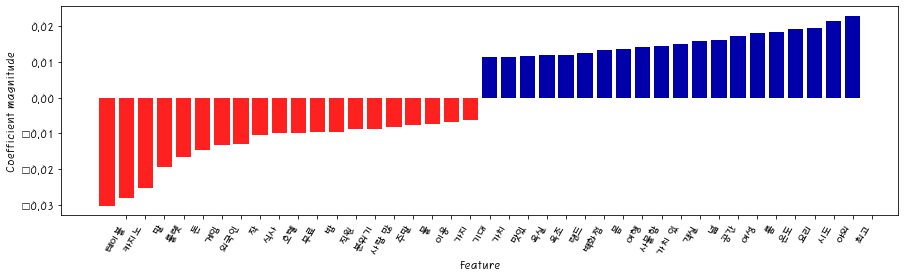

In [25]:
import matplotlib
import matplotlib.pyplot as plt
import mglearn
import matplotlib.font_manager as fm

font_location=r'C:\Windows\Fonts\H2PORM.TTF'
font_name=fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font',family=font_name)
mglearn.tools.visualize_coefficients(grid.best_estimator_.coef_, experience_names, n_top_features=20)
plt.show()

# 경관

In [26]:
cv_scene=CountVectorizer(
    min_df=0.01,
    max_df=0.05,
    ngram_range=(1,3),
    tokenizer=lambda x: x.split())

scene_X=cv_scene.fit_transform(scene['word'])

print(scene_X.shape)
cv_scene.vocabulary_

(5884, 385)


{'식사': 197,
 '모르': 127,
 '커피': 336,
 '바라보': 134,
 '올라가': 229,
 '후': 380,
 '산책 좋': 172,
 '식당': 196,
 '자연': 272,
 '있 좋': 266,
 '맑': 118,
 '물': 131,
 '조용': 296,
 '분위기': 155,
 '산책로': 173,
 '공사': 32,
 '앞': 208,
 '시작': 194,
 '마을': 109,
 '나오': 66,
 '걸': 16,
 '걸 있': 17,
 '중심': 313,
 '위치': 234,
 '주위': 309,
 '트': 348,
 '가능': 4,
 '입구': 251,
 '괜찮': 41,
 '넓': 73,
 '국제': 45,
 '국제 시장': 46,
 '시민': 191,
 '항구': 366,
 '주': 305,
 '시원': 193,
 '바람': 135,
 '여름': 219,
 '느낌': 81,
 '받': 138,
 '관광': 34,
 '명소': 126,
 '건물': 14,
 '관광 명소': 35,
 '정도': 290,
 '아침': 204,
 '배': 147,
 '뒤': 99,
 '느끼': 80,
 '공간': 28,
 '시설': 192,
 '늘': 82,
 '세계': 180,
 '다음': 88,
 '깨끗': 60,
 '안': 205,
 '상점': 175,
 '판매': 351,
 '적': 280,
 '터미널': 344,
 '사': 163,
 '사람 많': 164,
 '이전': 242,
 '가깝': 3,
 '기대': 54,
 '지하철': 317,
 '도보': 94,
 '접근': 289,
 '만들': 114,
 '점': 288,
 '끝': 63,
 '모습': 128,
 '교통': 42,
 '있 곳': 254,
 '여유': 220,
 '알': 207,
 '이용': 241,
 '기다리': 53,
 '앉': 206,
 '상징': 177,
 '아이': 203,
 '하 좋': 359,
 '비교': 161,
 '백화점': 148,
 '전': 282,
 '가운데

In [27]:
scene_names=cv_scene.get_feature_names()
print ( "기능 수 : {}". format (len (scene_names)))
print(experience_names)

기능 수 : 385
['가능', '가족', '가지', '가치', '가치 있', '개인', '객실', '거대', '거리', '걷', '게임', '경우', '고급', '공간', '관광객', '괜찮', '근처', '기대', '기분', '긴장', '날', '남성', '남성 여성', '낮', '넓', '넣', '놀', '높', '느낌', '다음', '대부분', '도착', '돈', '돌', '드', '들', '들어가', '따뜻', '땀', '때밀이', '랜드', '레스토랑', '로커', '룰렛', '룸', '마사지', '마시', '마지막', '말', '맛있', '맥주', '먹', '몸', '무료', '문화', '물', '바닥', '바디', '밖', '발', '밤', '방법', '백화점', '보', '보내', '보이', '부분', '분리', '분위기', '비', '비교', '비싸', '사람 많', '사랑', '사물함', '사용 있', '사우', '사우나', '사진', '샤워', '샴푸', '서비스', '선택', '세계', '손', '쇼핑', '수건', '수영장', '쉽', '슈퍼', '시간 있', '시도', '시티', '식당', '식사', '신발', '신세계', '아이', '아침', '안', '앉', '알', '알몸', '앞', '야경', '야외', '얻', '여성', '여행', '역', '영어', '영역', '옆', '예약', '오', '오후', '온도', '옷', '외국인', '요금', '요리', '욕실', '욕조', '위치', '음료', '음식', '의자', '이상', '이용', '이전', '이후', '일', '일반', '일본어', '일부', '입', '입구', '입장료', '있 있', '있 좋', '자', '자리', '자신', '작', '재미', '재미있', '저녁', '저렴', '전', '전체', '전통', '제공', '종류', '좋 하', '주', '주말', '준비', '즐기', '지불', '지하철', '직원', '찾', '처음', '체험', '최고', '추가'

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid={'C':[0.001,0.01,0.1,1,10]}
grid=GridSearchCV(LogisticRegression(),param_grid,cv=5)
grid.fit(scene_X,scene['score'])

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

Best cross-validation score: 0.76
Best parameters:  {'C': 0.001}
Best estimator:  LogisticRegression(C=0.001)


C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


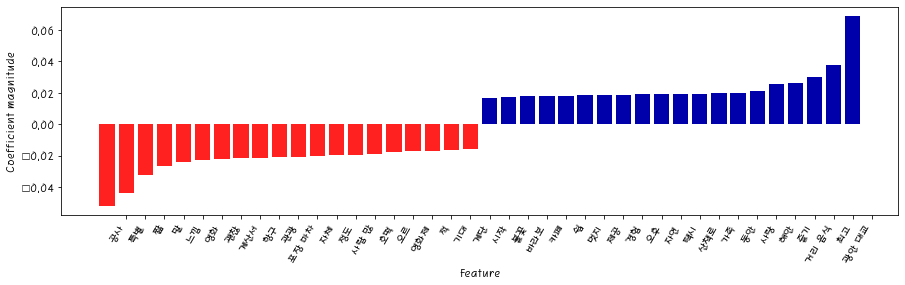

In [29]:
import matplotlib
import matplotlib.pyplot as plt
import mglearn
import matplotlib.font_manager as fm

font_location=r'C:\Windows\Fonts\H2PORM.TTF'
font_name=fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font',family=font_name)
mglearn.tools.visualize_coefficients(grid.best_estimator_.coef_, scene_names, n_top_features=20)
plt.show()

# 쇼핑

In [30]:
cv_shopping=CountVectorizer(
    min_df=0.03,
    max_df=0.5,
    ngram_range=(1,3),
    tokenizer=lambda x: x.split())

shopping_X=cv_shopping.fit_transform(shopping['word'])

print(shopping_X.shape)
cv_shopping.vocabulary_

(3811, 161)


{'쇼핑': 77,
 '좋': 127,
 '브랜드': 62,
 '많': 43,
 '푸드': 148,
 '되': 38,
 '같': 7,
 '작': 114,
 '생각': 72,
 '들': 39,
 '건물': 10,
 '유명': 103,
 '느낌': 32,
 '때': 40,
 '오': 98,
 '신발': 86,
 '곳': 16,
 '가격': 3,
 '방문': 58,
 '물건': 50,
 '찾': 135,
 '정도': 123,
 '옷': 99,
 '하': 150,
 '맛': 45,
 '먹': 47,
 '추천': 138,
 '좋 하': 128,
 '백화점': 59,
 '저렴': 118,
 '구입': 20,
 '크': 141,
 '다양': 33,
 '근처': 23,
 '위치': 102,
 '세계': 76,
 '층': 139,
 '종류': 126,
 '사람': 65,
 '필요': 149,
 '앞': 92,
 '훌륭': 159,
 '선택': 75,
 '경험': 15,
 '쉽': 79,
 '판매': 143,
 '대부분': 35,
 '관광객': 18,
 '여행': 95,
 '시간': 80,
 '없': 94,
 '국제': 21,
 '경우': 14,
 '상점': 70,
 '사용': 67,
 '걷': 11,
 '찾 있': 136,
 '날': 28,
 '쇼핑몰': 78,
 '거리': 9,
 '후': 158,
 '지역': 132,
 '높': 31,
 '일부': 108,
 '준비': 131,
 '가게': 1,
 '레스토랑': 41,
 '발견': 56,
 '알': 91,
 '마차': 42,
 '한국어': 151,
 '시도': 81,
 '최고': 137,
 '사': 64,
 '맛있': 46,
 '파': 142,
 '싸': 89,
 '음식': 104,
 '받': 55,
 '제공': 124,
 '보': 60,
 '호텔': 156,
 '관광': 17,
 '지하철': 134,
 '걸': 12,
 '얻': 93,
 '가': 0,
 '거대': 8,
 '동안': 37,
 '있 곳': 109,
 '장소':

In [31]:
shopping_names=cv_shopping.get_feature_names()
print ( "기능 수 : {}". format (len (shopping_names)))
print(shopping_names)

기능 수 : 161
['가', '가게', '가게 있', '가격', '가지', '가치', '가치 있', '같', '거대', '거리', '건물', '걷', '걸', '게', '경우', '경험', '곳', '관광', '관광객', '구경', '구입', '국제', '국제 시장', '근처', '기념품', '길', '깨끗', '낙지', '날', '냄새', '넓', '높', '느낌', '다양', '다음', '대부분', '돌', '동안', '되', '들', '때', '레스토랑', '마차', '많', '말', '맛', '맛있', '먹', '먹 있', '물', '물건', '물고기', '물고기 시장', '바다', '밖', '받', '발견', '밤', '방문', '백화점', '보', '분위기', '브랜드', '비싸', '사', '사람', '사시미', '사용', '사진', '살', '상점', '상품', '생각', '생선', '생선 시장', '선택', '세계', '쇼핑', '쇼핑몰', '쉽', '시간', '시도', '시장 있', '식당', '식사', '식품', '신발', '신선', '신선 해산물', '싸', '아침', '알', '앞', '얻', '없', '여행', '역', '옆', '오', '옷', '요리', '위층', '위치', '유명', '음식', '의류', '일', '일본어', '일부', '있 곳', '있 많', '있 시장', '있 좋', '자갈치', '작', '장소', '재미', '저녁', '저렴', '전', '전복', '전통', '점심', '정도', '제공', '제품', '종류', '좋', '좋 하', '주문', '주변', '준비', '지역', '지하', '지하철', '찾', '찾 있', '최고', '추천', '층', '친구', '크', '파', '판매', '팔', '편리', '포장', '포장 마차', '푸드', '필요', '하', '한국어', '해산물', '해산물 시장', '해운대', '현지', '호텔', '활기', '후', '훌륭', '흥미']


In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid={'C':[0.001,0.01,0.1,1,10]}
grid=GridSearchCV(LogisticRegression(),param_grid,cv=5)
grid.fit(shopping_X,shopping['score'])

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

Best cross-validation score: 0.70
Best parameters:  {'C': 0.01}
Best estimator:  LogisticRegression(C=0.01)


C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


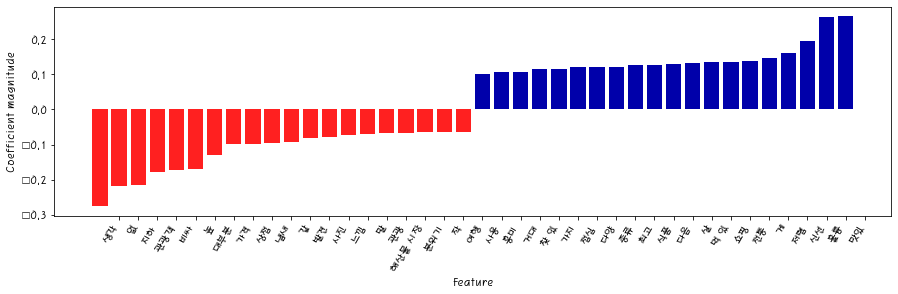

In [33]:
import matplotlib
import matplotlib.pyplot as plt
import mglearn
import matplotlib.font_manager as fm

font_location=r'C:\Windows\Fonts\H2PORM.TTF'
font_name=fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font',family=font_name)
mglearn.tools.visualize_coefficients(grid.best_estimator_.coef_, shopping_names, n_top_features=20)
plt.show()

# 축제

In [34]:
cv_festival=CountVectorizer(
    min_df=0.01,
    max_df=0.1,
    ngram_range=(1,3),
    tokenizer=lambda x: x.split())

festival_X=cv_festival.fit_transform(festival['word'])

print(festival_X.shape)
cv_festival.vocabulary_

(19, 1317)


{'최근': 1126,
 '간': 33,
 '자리': 938,
 '중요': 1064,
 '비롯': 361,
 '접하': 1003,
 '각지': 30,
 '고품격': 85,
 '포기': 1210,
 '고민': 80,
 '무대': 278,
 '인사': 868,
 '추가': 1137,
 '해수욕장': 1261,
 '부대': 342,
 '기간': 159,
 '셔틀버스': 470,
 '운행': 790,
 '최근 간': 1127,
 '간 일': 34,
 '일 많': 880,
 '많 자리': 237,
 '자리 세계': 939,
 '세계 영화': 460,
 '영화 중요': 661,
 '중요 행사': 1065,
 '행사 열리': 1277,
 '열리 행사': 606,
 '행사 작품': 1279,
 '작품 비롯': 950,
 '비롯 평소': 362,
 '평소 접하': 1204,
 '접하 세계': 1004,
 '세계 각지': 458,
 '각지 고품격': 31,
 '고품격 영화': 86,
 '영화 많': 627,
 '많 상영': 233,
 '상영 시간': 426,
 '시간 포기': 504,
 '포기 고민': 1211,
 '고민 하': 83,
 '하 일': 1237,
 '일 밖': 882,
 '밖 유명': 298,
 '유명 감독': 809,
 '감독 배우': 41,
 '배우 무대': 324,
 '무대 인사': 279,
 '인사 하': 869,
 '하 고민': 1223,
 '고민 추가': 81,
 '추가 영화': 1138,
 '전당 비롯': 981,
 '비롯 해운대': 364,
 '해운대 해수욕장': 1270,
 '해수욕장 각종': 1262,
 '각종 부대': 26,
 '부대 행사': 343,
 '행사 기간': 1275,
 '기간 셔틀버스': 160,
 '셔틀버스 운행': 471,
 '최근 간 일': 1128,
 '간 일 많': 35,
 '일 많 자리': 881,
 '많 자리 세계': 238,
 '자리 세계 영화': 940,
 '세계 영화 중요': 461,
 '영화 중요 행사': 662

In [35]:
festival_names=cv_festival.get_feature_names()
print ( "기능 수 : {}". format (len (festival_names)))
print(festival_names)

기능 수 : 1317
['가 곳', '가 곳 사', '가 국제', '가 국제 영화제', '가 명소', '가 명소 하', '가 알', '가 알 사람', '가 재미있', '가 출구', '가꾸', '가꾸 즐기', '가꾸 즐기 본래', '가능 폐막식', '가능 폐막식 영화', '가능 현장', '가능 현장 예매', '가을', '가을 되', '가을 되 풍부', '가정', '가정 시네마', '가정 시네마 센터', '가지 근처', '가지 근처 편리', '가지 놀랍', '각종 부대', '각종 부대 행사', '각종 세계', '각종 세계 유명', '각지', '각지 고품격', '각지 고품격 영화', '간', '간 일', '간 일 많', '간섭', '간섭 압력', '간섭 압력 행사', '감독 국가', '감독 국가 감독', '감독 배우', '감독 배우 무대', '감독 여배우', '감독 여배우 화려', '감독 연주가 없', '강추', '같', '개막식', '개막식 폐막식', '개막식 폐막식 구하', '개명', '개명 제정', '개명 제정 축제', '개발', '개발 촉진', '개발 촉진 노력', '개방', '개방 공기', '개방 공기 연주', '개최 영화', '개최 영화 회장', '개최 최초', '개최 최초 영화제', '개회식', '개회식 성공', '개회식 성공 구입', '거리', '거리 음식', '거리 음식 경험', '거리 음식 일', '거리 음식 팝업', '건물', '건물 멋있', '건물 멋있 유니크', '경험', '계획 시장', '계획 시장 개명', '계획 제정', '계획 제정 많', '고민', '고민 추가', '고민 추가 영화', '고민 하', '고민 하 일', '고품격', '고품격 영화', '고품격 영화 상영', '곡', '곡 연주', '곡 연주 오케스트라', '곳 분위기', '곳 분위기 좋', '곳 사', '곳 사 사람', '공기', '공기 연주', '공기 연주 입장료', '관객', '관객 관점', '관객 관점 젊', '관광 명소 가', '관광 명소 명동', '관람', '관람 

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid={'C':[0.001,0.01,0.1,1,10]}
grid=GridSearchCV(LogisticRegression(),param_grid,cv=5)
grid.fit(festival_X,festival['score'])

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Best cross-validation score: 0.80
Best parameters:  {'C': 0.001}
Best estimator:  LogisticRegression(C=0.001)


C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


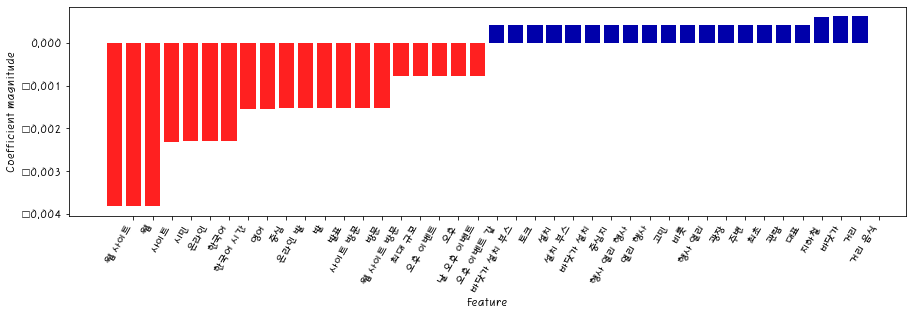

In [37]:
import matplotlib
import matplotlib.pyplot as plt
import mglearn
import matplotlib.font_manager as fm

font_location=r'C:\Windows\Fonts\H2PORM.TTF'
font_name=fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font',family=font_name)
mglearn.tools.visualize_coefficients(grid.best_estimator_.coef_, festival_names, n_top_features=20)
plt.show()

# 기타

In [38]:
cv_etc=CountVectorizer(
    min_df=0.02,
    max_df=0.05,
    ngram_range=(1,3),
    tokenizer=lambda x: x.split())

etc_X=cv_etc.fit_transform(etc['word'])

print(etc_X.shape)
cv_etc.vocabulary_

(1057, 165)


{'앉': 74,
 '주위': 117,
 '중국어': 119,
 '경험': 10,
 '지역': 122,
 '혼잡': 160,
 '거리': 7,
 '길': 22,
 '이해': 92,
 '다음': 30,
 '위치': 87,
 '훌륭': 164,
 '방문': 52,
 '도움': 34,
 '일': 95,
 '친절': 142,
 '가격': 0,
 '최고': 139,
 '서면': 65,
 '들': 39,
 '장소': 104,
 '직원': 131,
 '이상': 90,
 '주요': 116,
 '편안': 151,
 '동안': 37,
 '돌': 36,
 '오': 83,
 '받': 47,
 '보': 56,
 '있 좋': 100,
 '수단': 68,
 '공항 시내': 13,
 '방면': 51,
 '처음': 137,
 '익숙': 94,
 '짐': 132,
 '앞': 75,
 '좌석': 114,
 '넓': 24,
 '경전철': 9,
 '차량': 135,
 '가능': 1,
 '액세스': 76,
 '갈': 5,
 '모르': 43,
 '호텔': 159,
 '정도': 110,
 '방송': 53,
 '지하철 환승': 129,
 '한국어 영어': 157,
 '표': 154,
 '느낌': 27,
 '목적지': 44,
 '지도': 120,
 '쾌적': 145,
 '승차': 70,
 '나오': 23,
 '터미널': 147,
 '얻': 78,
 '제공': 111,
 '찾': 136,
 '선택': 67,
 '후': 163,
 '서비스': 66,
 '작': 103,
 '가치': 3,
 '마찬가지': 41,
 '곳 있': 12,
 '빠르': 60,
 '철도': 138,
 '접근': 109,
 '지하철 선': 125,
 '편하': 153,
 '노선도': 25,
 '하루': 156,
 '다니': 28,
 '복잡': 57,
 '사': 61,
 '운전': 85,
 '이용 있': 91,
 '편리 지하철': 150,
 '구매': 18,
 '기계': 20,
 '역 지하철': 82,
 '문제': 46,
 '점': 108,

In [39]:
etc_names=cv_etc.get_feature_names()
print ( "기능 수 : {}". format (len (etc_names)))
print(etc_names)

기능 수 : 165
['가격', '가능', '가방', '가치', '간단', '갈', '개찰구', '거리', '걷', '경전철', '경험', '계단', '곳 있', '공항 시내', '관광 명소', '관광객', '괜찮', '교통 카드', '구매', '구입 있', '기계', '기본', '길', '나오', '넓', '노선도', '노인', '느낌', '다니', '다르', '다음', '대응', '대중', '대중 교통', '도움', '돈', '돌', '동안', '동전', '들', '라인', '마찬가지', '명소', '모르', '목적지', '무인', '문제', '받', '발매기', '발매기 일본어', '발표', '방면', '방문', '방송', '방송국', '번호', '보', '복잡', '불편', '비교', '빠르', '사', '사상', '사용 쉽', '상점', '서면', '서비스', '선택', '수단', '스테이션', '승차', '시설', '싸', '안심', '앉', '앞', '액세스', '어렵', '얻', '에스컬레이터', '엘리베이터', '역 번호', '역 지하철', '오', '운송', '운전', '운행', '위치', '유용', '이번', '이상', '이용 있', '이해', '이해 쉽', '익숙', '일', '일본어 표기', '일부', '읽', '있 역', '있 좋', '있 편리', '자동', '작', '장소', '전', '전철', '전하', '점', '접근', '정도', '제공', '좋 방법', '좋 지하철', '좌석', '주변', '주요', '주위', '주의', '중국어', '지도', '지상', '지역', '지하', '지하철 사용', '지하철 선', '지하철 시스템', '지하철 이용', '지하철 편리', '지하철 환승', '지하철역', '직원', '짐', '차', '차내', '차량', '찾', '처음', '철도', '최고', '출구', '충전', '친절', '카드 구입', '카드 사용 있', '쾌적', '탐색', '터미널', '티켓 구입', '패스', '편리 지하철'

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid={'C':[0.001,0.01,0.1,1,10]}
grid=GridSearchCV(LogisticRegression(),param_grid,cv=5)
grid.fit(etc_X,etc['score'])

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

Best cross-validation score: 0.81
Best parameters:  {'C': 0.001}
Best estimator:  LogisticRegression(C=0.001)


C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


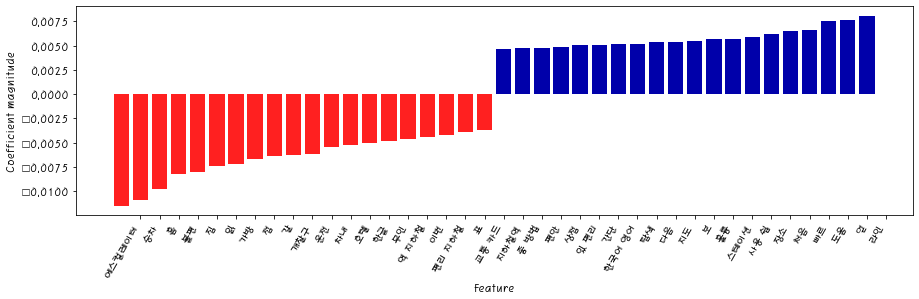

In [41]:
import matplotlib
import matplotlib.pyplot as plt
import mglearn
import matplotlib.font_manager as fm

font_location=r'C:\Windows\Fonts\H2PORM.TTF'
font_name=fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font',family=font_name)
mglearn.tools.visualize_coefficients(grid.best_estimator_.coef_, etc_names, n_top_features=20)
plt.show()

# 기타-축제

In [42]:
cv_etc_festival=CountVectorizer(
    min_df=0.03,
    max_df=0.1,
    ngram_range=(1,3),
    tokenizer=lambda x: x.split())

etc_festival_X=cv_etc_festival.fit_transform(etc_festival['word'])

print(etc_festival_X.shape)
cv_etc_festival.vocabulary_

(51, 231)


{'최고': 185,
 '올해': 134,
 '괜찮': 21,
 '구경': 22,
 '준비': 176,
 '최고 불꽃': 186,
 '축제 불꽃': 191,
 '불꽃 축제 불꽃': 100,
 '축제 불꽃 축제': 192,
 '아이': 121,
 '다음': 55,
 '같': 6,
 '불꽃놀이': 101,
 '크': 198,
 '오': 130,
 '사람 많': 103,
 '밤': 82,
 '모양': 78,
 '광안': 19,
 '대교': 57,
 '일대': 149,
 '마린': 69,
 '시티': 117,
 '가을': 2,
 '화려 불꽃': 219,
 '광안 대교': 20,
 '마린 시티': 70,
 '관람 있': 16,
 '하늘': 206,
 '혼잡': 218,
 '땅': 65,
 '열리': 127,
 '행사': 217,
 '당일': 56,
 '오후': 131,
 '지하철': 181,
 '붐비': 102,
 '잡': 161,
 '지역': 179,
 '높': 51,
 '보이': 88,
 '지하철 붐비': 182,
 '자리 잡': 160,
 '높 곳': 52,
 '거리 있': 10,
 '있 불꽃 축제': 156,
 '해수욕장': 213,
 '마지막': 71,
 '대표': 58,
 '근처': 29,
 '바람': 80,
 '쌀쌀': 119,
 '밤하늘': 83,
 '대표 축제': 59,
 '불꽃 보': 98,
 '보 좋': 86,
 '부': 89,
 '축제 축제': 195,
 '축제 보': 190,
 '불꽃 축제 보': 99,
 '이때': 146,
 '가격': 0,
 '규모': 26,
 '주제': 175,
 '보 해변': 87,
 '되': 64,
 '시작': 115,
 '상점': 106,
 '아름답': 120,
 '유료': 139,
 '노래': 37,
 '낭만': 36,
 '있 곳': 150,
 '하 불꽃': 204,
 '석': 108,
 '나오': 35,
 '후': 227,
 '가지': 3,
 '돌아가': 62,
 '필요': 203,
 '유료 석': 140,
 '훌륭

In [43]:
etc_festival_names=cv_etc_festival.get_feature_names()
print ( "기능 수 : {}". format (len (etc_festival_names)))
print(etc_festival_names)

기능 수 : 231
['가격', '가능', '가을', '가지', '가치', '가치 있', '같', '개인', '개최', '거리 거리', '거리 있', '결정', '계획', '공연', '관광', '관광객 있', '관람 있', '관중', '광', '광안', '광안 대교', '괜찮', '구경', '구입', '군중', '권장', '규모', '그렇', '그렇 찾', '근처', '기다리', '기대', '기타', '길', '깨끗', '나오', '낭만', '노래', '놀랍', '놀이 공연', '놀이 관람', '놀이 다리', '놀이 바다', '놀이 보', '놀이 쇼', '놀이 쇼 놀랍', '놀이 시간', '놀이 있', '놀이 즐기', '놀이 축제 개최', '놀이 축제 유명', '높', '높 곳', '다리', '다리 보', '다음', '당일', '대교', '대표', '대표 축제', '도보', '도착', '돌아가', '동기', '되', '땅', '레스토랑 바', '레스토랑 좌석', '레이저', '마린', '마린 시티', '마지막', '만드', '많 관광객', '많 관광객 있', '많 레스토랑', '많 사람', '모래', '모양', '바', '바람', '밖', '밤', '밤하늘', '방문', '배경', '보 좋', '보 해변', '보이', '부', '불꽃 놀이 공연', '불꽃 놀이 다리', '불꽃 놀이 바다', '불꽃 놀이 보', '불꽃 놀이 쇼', '불꽃 놀이 시간', '불꽃 놀이 있', '불꽃 놀이 즐기', '불꽃 보', '불꽃 축제 보', '불꽃 축제 불꽃', '불꽃놀이', '붐비', '사람 많', '사람 준비', '삶', '상점', '생각', '석', '세계', '소요', '쇼 놀랍', '쇼 있', '쇼 즐기', '숨', '시작', '시작 오후', '시티', '식사', '쌀쌀', '아름답', '아이', '앉 있', '얻', '없', '여행', '열', '열리', '열차', '예약', '오', '오후', '오후 시작', '오후 시작 오후', '올해', '요리', '요리 있',

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid={'C':[0.001,0.01,0.1,1,10]}
grid=GridSearchCV(LogisticRegression(),param_grid,cv=5)
grid.fit(etc_festival_X,etc_festival['score'])

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Best cross-validation score: 0.92
Best parameters:  {'C': 0.001}
Best estimator:  LogisticRegression(C=0.001)


C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


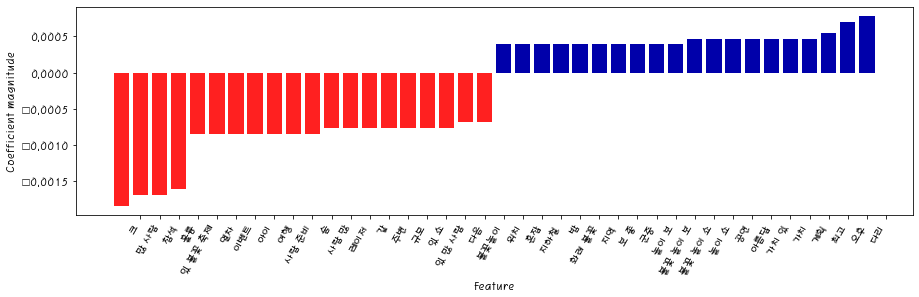

In [45]:
import matplotlib
import matplotlib.pyplot as plt
import mglearn
import matplotlib.font_manager as fm

font_location=r'C:\Windows\Fonts\H2PORM.TTF'
font_name=fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font',family=font_name)
mglearn.tools.visualize_coefficients(grid.best_estimator_.coef_, etc_festival_names, n_top_features=20)
plt.show()

# 기타-안내

In [46]:
cv_etc_info=CountVectorizer(
    min_df=0.03,
    max_df=0.5,
    ngram_range=(1,3),
    tokenizer=lambda x: x.split())

etc_info_X=cv_etc_info.fit_transform(etc_info['word'])

print(etc_info_X.shape)
cv_etc_info.vocabulary_

(264, 172)


{'관광': 13,
 '정보': 128,
 '얻': 94,
 '공항': 10,
 '국제선': 26,
 '층': 150,
 '옆': 102,
 '곳': 9,
 '지도': 135,
 '알': 92,
 '때': 46,
 '이용': 109,
 '관광 정보': 17,
 '정보 얻': 129,
 '얻 있': 95,
 '있 공항': 116,
 '있 관광': 117,
 '지도 있': 137,
 '여행': 98,
 '타': 155,
 '가': 0,
 '시간': 84,
 '오': 103,
 '같': 5,
 '하': 162,
 '앞': 93,
 '필요': 161,
 '없': 96,
 '안내소': 91,
 '사람': 72,
 '친절': 151,
 '관광객': 18,
 '좋': 132,
 '관광 안내소': 16,
 '정도': 127,
 '많': 53,
 '먹': 55,
 '전': 126,
 '구입': 22,
 '있 좋': 121,
 '안내': 89,
 '받': 62,
 '설명': 78,
 '찾': 144,
 '위치': 105,
 '도시': 37,
 '쉽': 81,
 '듣': 44,
 '질문': 141,
 '크': 153,
 '작': 123,
 '생각': 76,
 '라운지': 47,
 '안': 88,
 '국내선': 23,
 '면세점': 56,
 '밖': 61,
 '시설': 86,
 '모르': 57,
 '건물': 7,
 '일': 111,
 '도착': 40,
 '리무진': 51,
 '물': 60,
 '공항 도착': 12,
 '외국인': 104,
 '직원': 140,
 '거리': 6,
 '택시': 157,
 '환승': 168,
 '시내': 85,
 '들': 45,
 '제공': 131,
 '나오': 32,
 '출구': 147,
 '방문': 64,
 '도움': 38,
 '되': 43,
 '도움 되': 39,
 '비행기': 70,
 '체크인': 146,
 '이민': 108,
 '지역': 138,
 '후': 170,
 '가능': 1,
 '상점': 75,
 '공항 공항': 11,
 '효율': 169

In [47]:
etc_info_names=cv_etc_info.get_feature_names()
print ( "기능 수 : {}". format (len (etc_info_names)))
print(etc_info_names)

기능 수 : 172
['가', '가능', '가이드', '가지', '간단', '같', '거리', '건물', '경우', '곳', '공항', '공항 공항', '공항 도착', '관광', '관광 안내', '관광 안내 센터', '관광 안내소', '관광 정보', '관광객', '관광지', '괜찮', '교통', '구입', '국내선', '국제', '국제 공항', '국제선', '근처', '기다리', '기차', '길', '깨끗', '나오', '남포', '넓', '다양', '대응', '도시', '도움', '도움 되', '도착', '도착 로비', '동안', '되', '듣', '들', '때', '라운지', '레스토랑', '레스토랑 있', '로비', '리무진', '리무진 버스', '많', '말', '먹', '면세점', '모르', '무료', '문제', '물', '밖', '받', '받 있', '방문', '방향', '배', '버스', '보', '보이', '비행기', '빠르', '사람', '사용', '사용 있', '상점', '생각', '서비스', '설명', '센터', '수하물', '쉽', '스탭', '승강장', '시간', '시내', '시설', '아침', '안', '안내', '안내 센터', '안내소', '알', '앞', '얻', '얻 있', '없', '여객', '여행', '여행자', '역', '영어', '옆', '오', '외국인', '위치', '음식', '이동', '이민', '이용', '이전', '일', '일반', '일본어', '일본어 대응', '일부', '있 공항', '있 관광', '있 관광 안내소', '있 안내소', '있 일본어', '있 좋', '자체', '작', '장소', '적', '전', '정도', '정보', '정보 얻', '정중', '제공', '좋', '좋 생각', '중국어', '지도', '지도 받', '지도 있', '지역', '지하철', '직원', '질문', '짐', '차이', '찾', '책자', '체크인', '출구', '출발', '충분', '층', '친절', '카운터', '크', '크

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid={'C':[0.001,0.01,0.1,1,10]}
grid=GridSearchCV(LogisticRegression(),param_grid,cv=5)
grid.fit(etc_info_X,etc_info['score'])

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

Best cross-validation score: 0.63
Best parameters:  {'C': 0.01}
Best estimator:  LogisticRegression(C=0.01)


C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


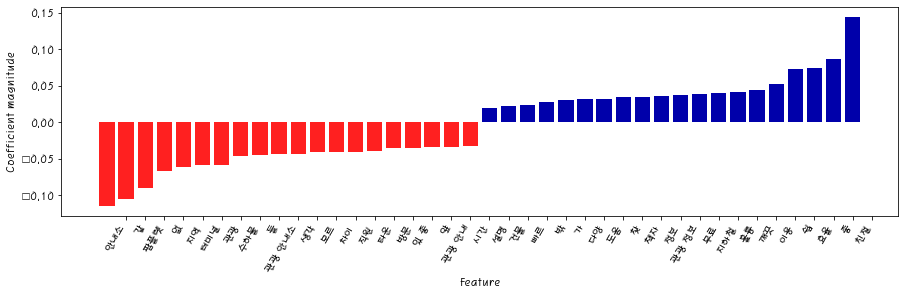

In [49]:
import matplotlib
import matplotlib.pyplot as plt
import mglearn
import matplotlib.font_manager as fm

font_location=r'C:\Windows\Fonts\H2PORM.TTF'
font_name=fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font',family=font_name)
mglearn.tools.visualize_coefficients(grid.best_estimator_.coef_, etc_info_names, n_top_features=20)
plt.show()